### Load the dataset

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-trainval', dataroot='data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 282.3 seconds.
Reverse indexing ...
Done reverse indexing in 268.5 seconds.


---

### The number of each Object in the dataset

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import mplcursors
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.rcParams['figure.figsize'] = 15,5 # set the size of graph

In [3]:
categories = [category['name'].split('.')[-1] for category in nusc.category]

In [4]:
annotations_in_numpy_array = np.array(nusc.sample_annotation)

In [5]:
def actual_name(name):
    return name.split('.')[-1]
# len(annotations_in_numpy_array)

In [6]:
count_categories_in_annots = []
for i in range(0, len(categories)):
    count_categories_in_annots.append(0)
    for j in range(0, len(annotations_in_numpy_array)):
        if (actual_name(annotations_in_numpy_array[j]['category_name']) == categories[i]):
            count_categories_in_annots[i] += 1

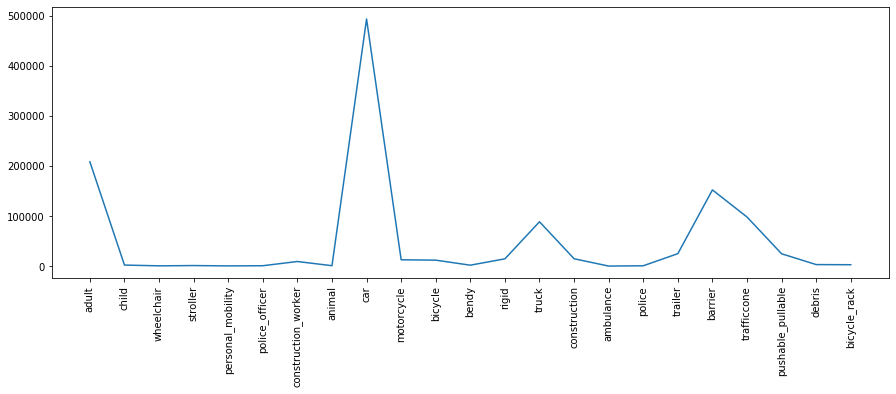

In [82]:
plt.plot(count_categories_in_annots)
plt.xticks(list(range(0,23)), categories, rotation='vertical')
plt.yticks()
mplcursors.cursor(hover=True)
plt.show()

---

### Percentage (%) Composition of each Identified Object

In [8]:
total = np.array(count_categories_in_annots).sum()
percentage_composition_of_each_annotation = [(i/total)*100 for i in count_categories_in_annots]

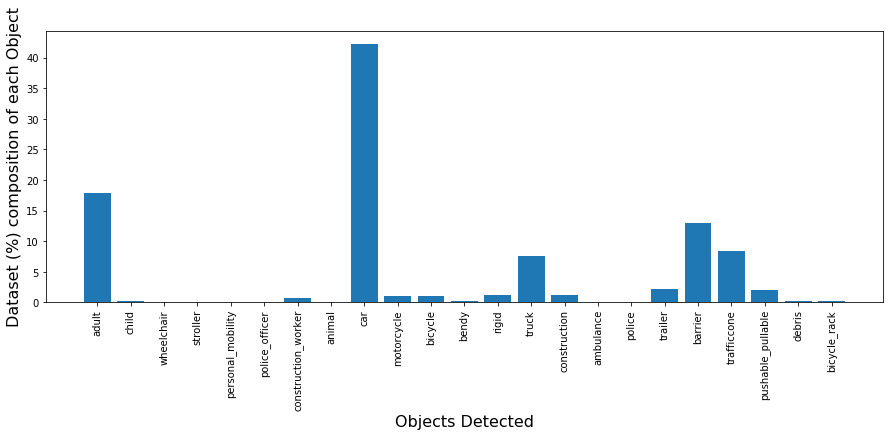

In [9]:
plt.bar(categories, percentage_composition_of_each_annotation)
plt.xticks(rotation='vertical')
plt.xlabel('Objects Detected', fontSize='16')
plt.ylabel('Dataset (%) composition of each Object', fontSize='16')
plt.show()
# percentage_composition_of_each_annotation

---

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [11]:
# Count How many annotations are doing what
movables = ['adult', 'child', 'wheelchair', 'personal_mobility', 'police_officer', 'construction_worker',
            'animal', 'car', 'motorcycle', 'bicycle', 'truck', 'ambulance', 'police', 'trailer']

In [12]:
annotations_in_numpy_array = np.array(nusc.sample_annotation)

In [19]:
def actual_name(name):
    return name.split('.')[-1]

In [20]:
# count the parked annotations
attributes = ['moving', 'stopped', 'parked', 'with_rider', 'without_rider', 'sitting_lying_down', 'standing']
attributes_dict = {'moving': 0, 'stopped': 1, 'parked': 2, 'with_rider': 3, 'without_rider': 4, 'sitting_lying_down': 5, 'standing': 6}

In [53]:
def plot_attributes(attr='moving'):
    annotations_attribute = []
    for i in range(0, len(movables)):
        annotations_attribute.append(0)
        for j in range(0, len(nusc.sample_annotation)):
#             take note the attribute_tokens key can be null
            if (len(nusc.sample_annotation[j]['attribute_tokens']) > 0 and  movables[i] == actual_name(nusc.sample_annotation[j]['category_name']) and 
                nusc.get('attribute', nusc.sample_annotation[j]['attribute_tokens'][-1])['name'].split('.')[-1] == attr):
                annotations_attribute[i] += 1    
    return annotations_attribute

In [54]:
attributes_matrix = np.array([plot_attributes(attr=i) for i in attributes])

In [55]:
# find total for each column
# https://www.geeksforgeeks.org/matrix-manipulation-python/
tot = np.sum(attributes_matrix, axis=0)

# create a totals matrix
totals_matrix = np.array([tot for i in attributes])

# find the percetages
percentage_matrix = np.matrix.round((attributes_matrix / totals_matrix) * 100, 2)

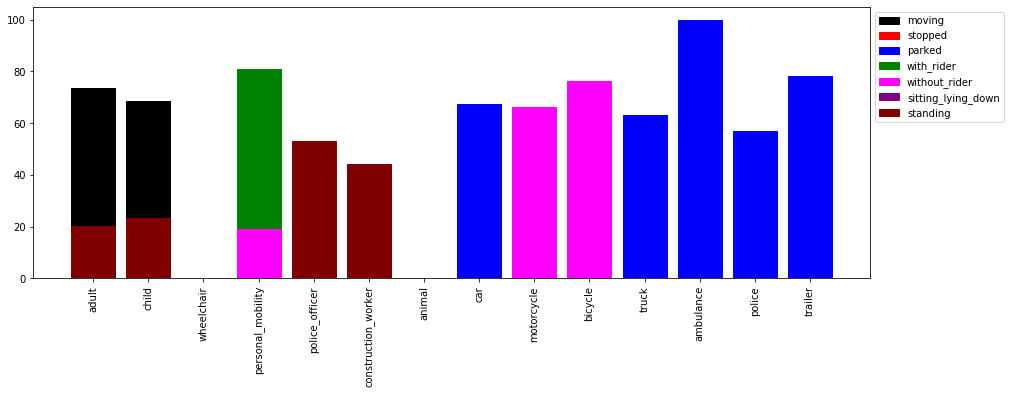

In [58]:
Color = {'moving' : 'Black', 'stopped' : 'Red', 'parked' : 'Blue','with_rider' : 'Green',
         'without_rider' : 'Magenta', 'sitting_lying_down' : 'Purple', 'standing' : 'Maroon'}
# Mrk = {'moving' : 's', 'stopped' : 'o', 'parked' : '^', 'with_rider' : 'D', 
#        'without_rider' : 's', 'sitting_lying_down' : 'o', 'standing' : '^'}
# for i in attributes_dict:
#     plt.plot(percentage_matrix[attributes_dict[i]], c=Color[i], ls='--', marker=Mrk[i], ms=7, label=i)
# plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.xticks(list(range(0, len(movables))), movables , rotation='vertical')
# plt.show()
for i in attributes_dict:
    plt.bar(movables, percentage_matrix[attributes_dict[i]], color=Color[i], edgecolor=Color[i], label=i)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(0, len(movables))), movables , rotation='vertical')
plt.show()

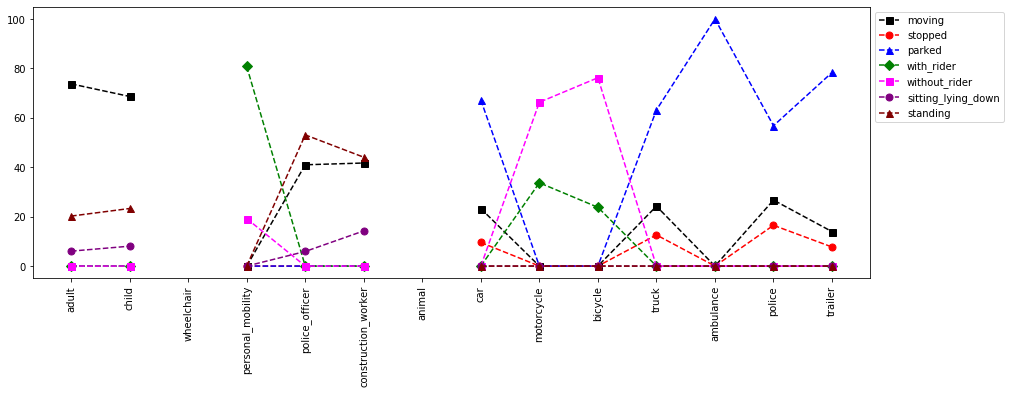

In [59]:
Color = {'moving' : 'Black', 'stopped' : 'Red', 'parked' : 'Blue','with_rider' : 'Green',
         'without_rider' : 'Magenta', 'sitting_lying_down' : 'Purple', 'standing' : 'Maroon'}
Mrk = {'moving' : 's', 'stopped' : 'o', 'parked' : '^', 'with_rider' : 'D', 
       'without_rider' : 's', 'sitting_lying_down' : 'o', 'standing' : '^'}
for i in attributes_dict:
    plt.plot(percentage_matrix[attributes_dict[i]], c=Color[i], ls='--', marker=Mrk[i], ms=7, label=i)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(0, len(movables))), movables , rotation='vertical')
plt.show()

---

### Average visibility of annotation in different external conditions (daylight, night, rainy day)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.rcParams['figure.figsize'] = 15,5 # set the size of graph
plt.rcParams["legend.shadow"] = False

In [61]:
sample_token = nusc.sample[60]['token']
category_name = nusc.category[2]['name']
sample_annotation_token = nusc.sample_annotation[3]['token']

In [62]:
def all_samples_by_description(descrip='night'):
    elements = []
    for i in nusc.sample_annotation:
        descriptions = map(lambda x:x.strip().lower(), nusc.get('scene', nusc.get('sample', i['sample_token'])['scene_token'])['description'].split(',')) 
        if descrip in descriptions:
            elements.append(i)
    return elements

def all_samples_recorded_by_day(descrip='night'):
    elements = []
    for i in nusc.sample_annotation:
        descriptions = map(lambda x:x.strip().lower(), nusc.get('scene', nusc.get('sample', i['sample_token'])['scene_token'])['description'].split(',')) 
        if descrip not in descriptions:
            elements.append(i)
    return elements

In [63]:
night_data = all_samples_by_description(descrip='night')
day_data = all_samples_recorded_by_day()
after_rain_data = all_samples_by_description(descrip='after rain')

In [76]:
visibility = {'1': 25, '2': 50, '3': 75, '4': 100}
conditions = ['night', 'daylight', 'after_rain']

In [77]:
def average_visibility(data=night_data):
    sum = 0
    for x in data:
         sum += visibility[x['visibility_token']]
    return sum/len(data)

In [78]:
average_visibility(data=after_rain_data)
conditions_visibility = [average_visibility(data=night_data), average_visibility(data=day_data), average_visibility(data=after_rain_data)]

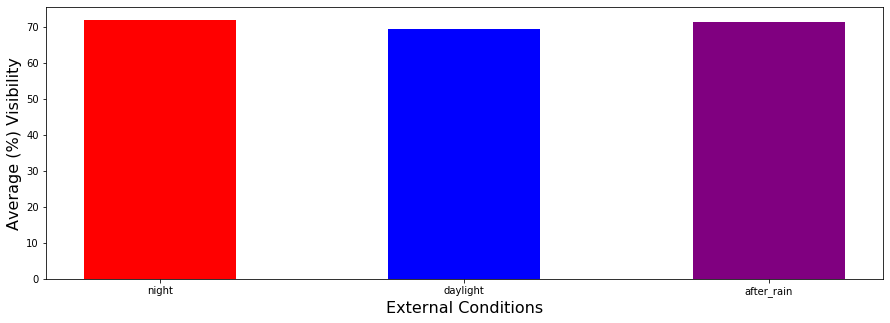

In [84]:
plt.bar(conditions, conditions_visibility, width=0.5, color=['red', 'blue', 'purple'])
plt.ylabel('Average (%) Visibility', fontsize=16)
plt.xlabel('External Conditions', fontsize=16)

cursor = mplcursors.cursor(hover=True)
@cursor.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.target.index].get_bbox().bounds
    sel.annotation.set(text=f"{x+width/2}: {height}", position=(0, 20))
    sel.annotation.xy = (x + width / 2, y + height)

plt.show()

---

### Percentage composition of all the conditions 

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.rcParams['figure.figsize'] = 15,5 # set the size of graph
plt.rcParams["legend.shadow"] = True

In [71]:
night_data = all_samples_by_description(descrip='night')
day_data = all_samples_recorded_by_day()
after_rain_data = all_samples_by_description(descrip='after rain')

In [73]:
data = np.array([len(night_data), len(day_data), len(after_rain_data)])
# sample total
total = data.sum()

# percentage of data samples from each external condition
percentage_data = [(i/total)*100 for i in data]

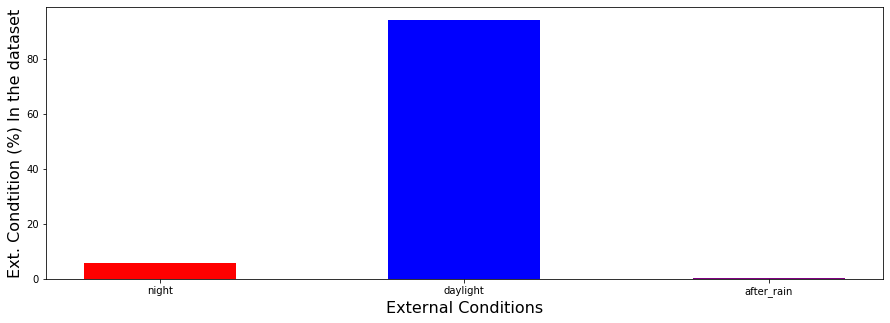

In [75]:
conditions = ['night', 'daylight', 'after_rain']
plt.bar(conditions, percentage_data, width=0.5, color=['red', 'blue', 'purple'])
plt.ylabel('Ext. Condtition (%) In the dataset', fontsize=16)
plt.xlabel('External Conditions', fontsize=16)
plt.show()

In [89]:
import torch

In [94]:
torch.cuda

<module 'torch.cuda' from '/home/tangos/.conda/envs/p37/lib/python3.7/site-packages/torch/cuda/__init__.py'>